<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A6%AC%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

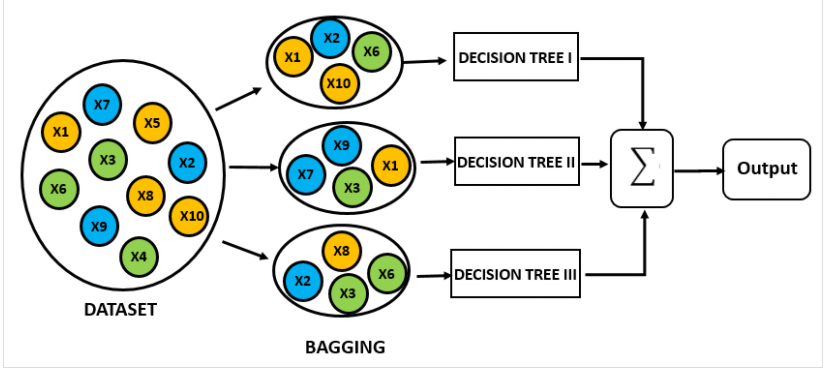

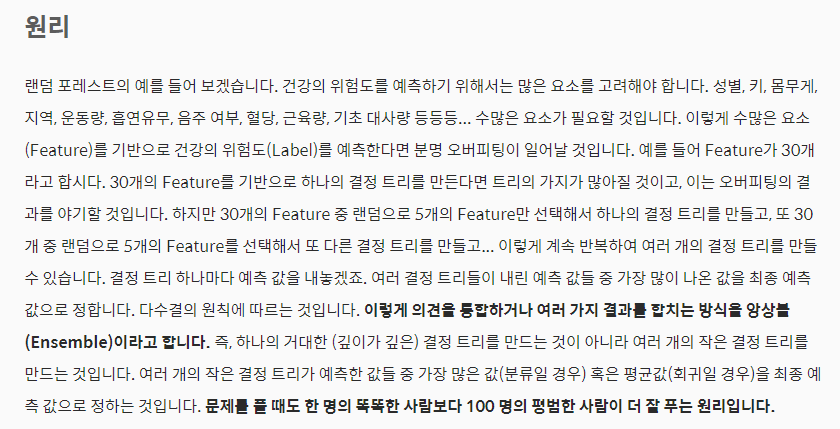

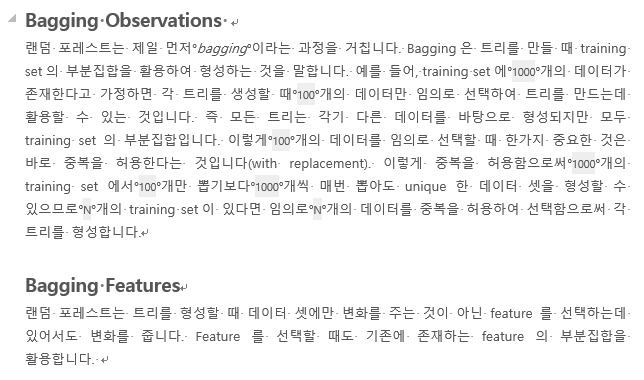

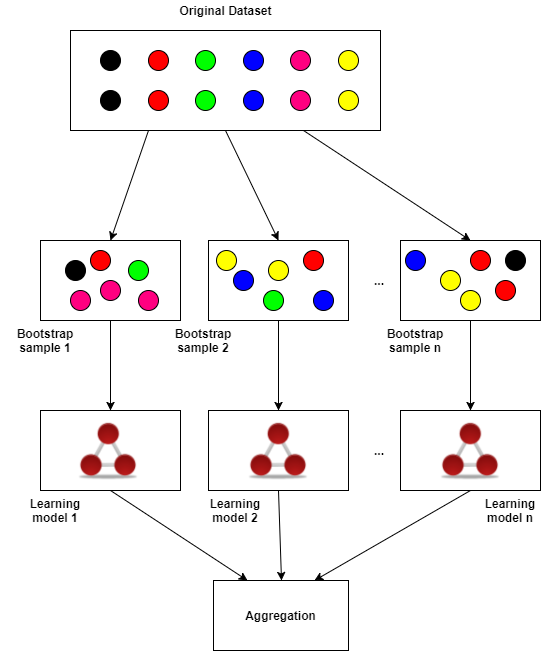

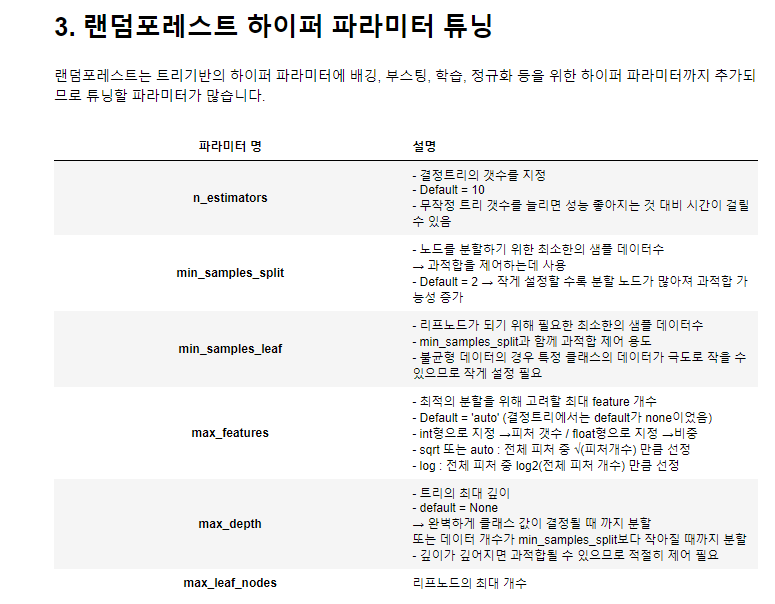

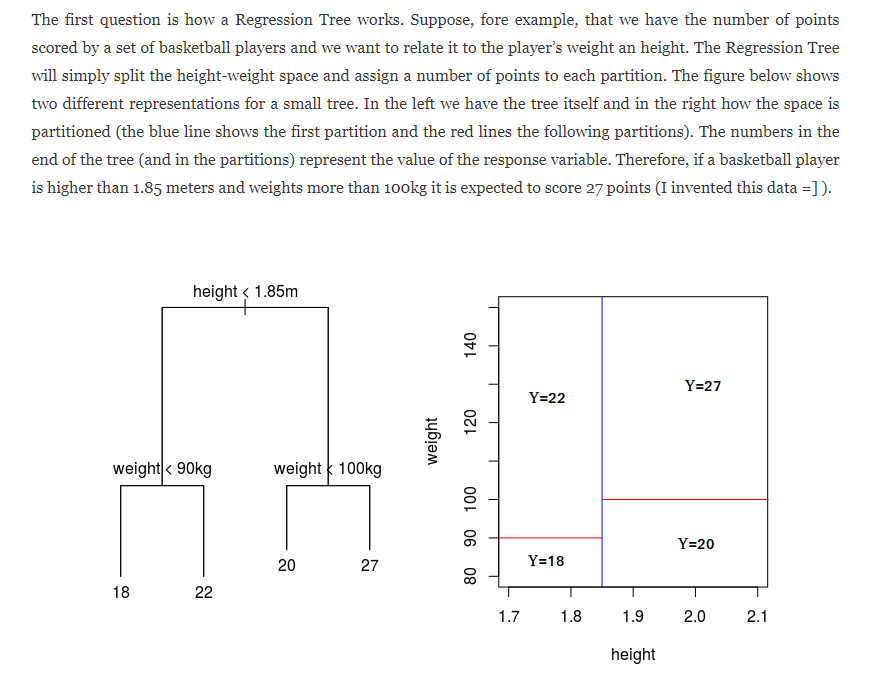

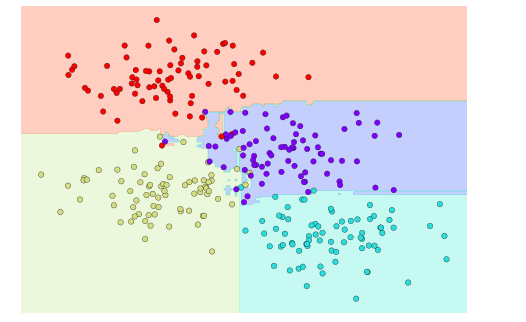

# 하이퍼 파라미터 튜닝

https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

In [1]:
from sklearn.datasets import load_wine                  # 연습 데이터
from sklearn.model_selection import train_test_split    # 샘플 나누기
from sklearn import ensemble              
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-misc
!pip install pdpbox

In [2]:
data = load_wine()   # data load 
data.target[[10, 80, 140]]
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.columns)
df.head()


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df=df[["alcohol", "color_intensity", "proline"]]   # 2개 설명변수로 줄임
df

,alcohol,color_intensity,proline
0,14.23,5.64,1065.0
1,13.20,4.38,1050.0
2,13.16,5.68,1185.0
3,14.37,7.80,1480.0
4,13.24,4.32,735.0
...,...,...,...
173,13.71,7.70,740.0
174,13.40,7.30,750.0
175,13.27,10.20,835.0
176,13.17,9.30,840.0


In [3]:
X = np.log(df.iloc[:,1:].to_numpy()    ) # 로그변환
Y = np.log(df.iloc[:,0].to_numpy()     ) # Y변수 추출

In [4]:
X[1,]

array([ 0.57661336,  0.76080583,  2.41591378,  4.60517019,  0.97455964,
        1.01523068, -1.34707365,  0.24686008,  1.47704872,  0.04879016,
        1.22377543,  6.95654544])

# 표본 나누기 (train / test) 

In [5]:
wineNames = ["color", "proline"]
#np.array(data.feature_names[1:])
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 531)
print(len(xTrain), len(xTest))

124 54


In [ ]:
mseOos = []         # 변수 초기화
nTreeList = range(50, 500, 10)    # nTREE 최적화를 위한 서칭

In [ ]:
for iTrees in nTreeList:
    depth = None  
    maxFeat = None #조정해볼 것, 없으면 자동
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=531)
    wineRFModel.fit(xTrain, yTrain)
    #데이터 세트에 대한 MSE 누적
    prediction = wineRFModel.predict(xTest)
    mseOos.append(mean_squared_error(yTest, prediction))  # 각 트리갯수마다 MSE 계산
print("MSE")
print(mseOos)

MSE
[0.0016687475381329145, 0.0016447133994453604, 0.0016149074913788173, 0.0016295636230733064, 0.001664243059020965, 0.0016678420919427536, 0.0016802282227062985, 0.0016751929476734619, 0.0016666891003712168, 0.0016534365433125827, 0.0016527136934262239, 0.0016379568460056376, 0.0016214916926042748, 0.001616384203111652, 0.0016151035459693985, 0.0016056742477960166, 0.0016025128764302055, 0.001594689528752977, 0.001595602440727104, 0.0016013080708285905, 0.0016029077063221251, 0.001609606976246709, 0.001607407658146724, 0.0016084570101158018, 0.0016054026553808465, 0.001602940861597819, 0.001613098994477513, 0.0016171222350004793, 0.0016139485176906497, 0.0016154600650986, 0.0016173781406832125, 0.001617622516522888, 0.001621006305960876, 0.0016216575168043377, 0.0016203724397923166, 0.0016215760734110722, 0.0016221767969221681, 0.0016271408701440911, 0.0016269195271949154, 0.0016250582985466709, 0.0016254134592353917, 0.0016308192927099068, 0.0016345885932961145, 0.00163697601785942

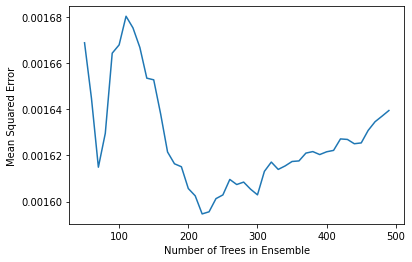

In [ ]:
plt.plot(nTreeList, mseOos)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Squared Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.show()      ## 210개에서 최소화됨

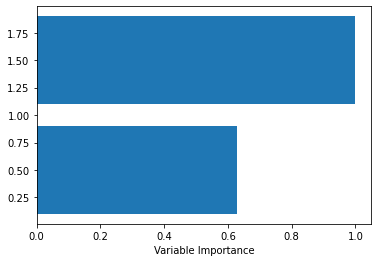

In [ ]:
featureImportance = wineRFModel.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
#plt.yticks(barPos, wineNames[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

최적화된 nTREE 사용

0.001249175894423885


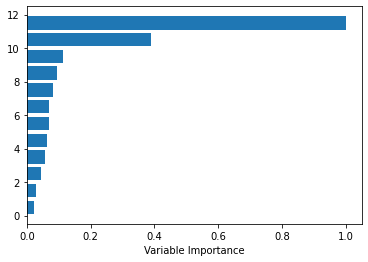

In [22]:
m = RandomForestRegressor(max_depth=4, random_state=531,    # MSE 를 줄이도록 max_depth 조정
                          n_estimators=210)
m.fit(xTrain, yTrain)
prediction = m.predict(xTest)
print(mean_squared_error(yTest, prediction))
featureImportance = m.feature_importances_


#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
#plt.yticks(barPos, wineNames[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

# In-sample Fit

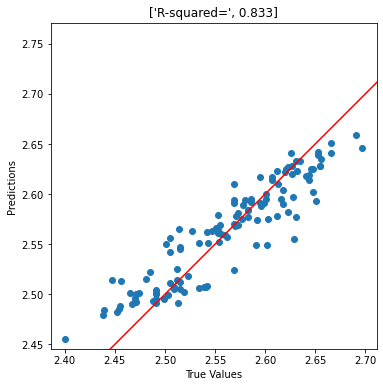

In [71]:
from sklearn.metrics import r2_score

r2=r2_score(yTrain, m.predict(xTrain))

## 테스트 셋에 대한 예측결과 시각화
plt.figure(figsize=(6,6))
plt.scatter(yTrain, m.predict(xTrain) );plt.xlabel('True Values');plt.ylabel('Predictions');plt.axis('equal');plt.axis('square'); plt.title(["R-squared=", np.round(r2,3)])
#plt.xlim([-1,plt.xlim()[1]]);plt.ylim([-1,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], "r")
plt.show()

# Out-of-sample Fit

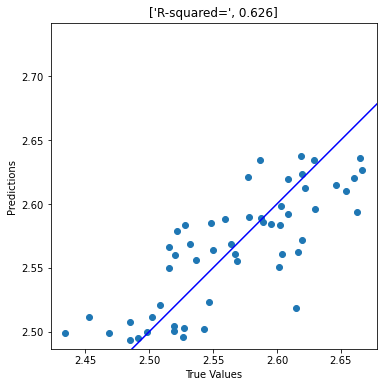

In [72]:
from sklearn.metrics import r2_score

r2=r2_score(yTest, m.predict(xTest))

## 테스트 셋에 대한 예측결과 시각화
plt.figure(figsize=(6,6))
plt.scatter(yTest, m.predict(xTest) );plt.xlabel('True Values');plt.ylabel('Predictions');plt.axis('equal');plt.axis('square'); plt.title(["R-squared=", np.round(r2,3)])
#plt.xlim([-1,plt.xlim()[1]]);plt.ylim([-1,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], "b")
plt.show()

In [8]:
#!pip install pdpbox
from pdpbox import pdp
from plotnine import *

     |████████████████████████████████| 57.7MB 76kB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690724 sha256=d01c3253ce0b86300ec882b422cf05a76cd7cf32973b6c10cd4314350e532488
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


# partial dependence from sample




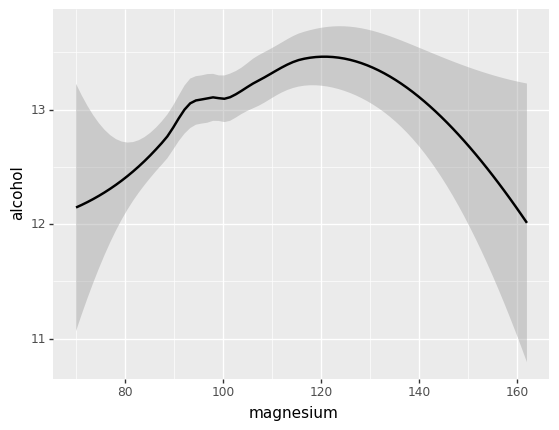

<ggplot: (8739336044699)>

In [21]:
#!pip install scikit-misc

#x_all = get_sample(X, 500)
ggplot(df, aes('magnesium', 'alcohol'))+stat_smooth(se=True, method='loess')

# partial dependence from prediction

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2c8ce8d1d0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2c8cf3d7f0>})

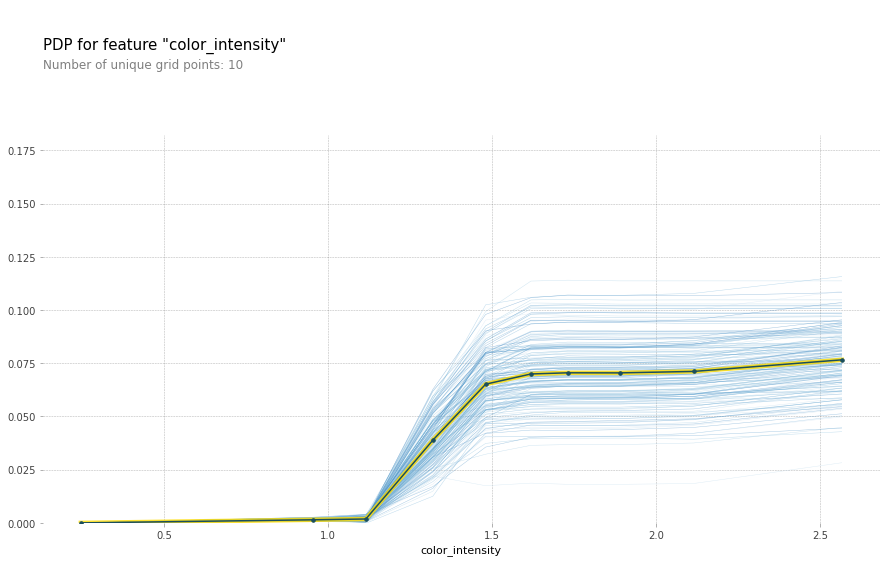

In [51]:
#x = get_sample(X_train[X_train.YearMade>1930], 500)
x = np.log(df.iloc[:,1:])
           
def plot_pdp(feat, clusters=None, feat_name=None):
   feat_name = feat_name or feat
   p = pdp.pdp_isolate(model=m, dataset=x, model_features=list(x), feature=feat)
   return pdp.pdp_plot(p, feat_name, plot_lines=True, cluster=clusters is not None, n_cluster_centers=clusters)

plot_pdp(list(x)[8])   # list는 변수 이름


# marginal impact of covariates

In [ ]:
param = pd.read_csv('param.csv')      ## 시도별 아파트 매매가격 지수, 서울은 동별 (2015년 1월~2020년 10월)
param

,x1,x2
0,2.066000,6.586
1,2.086660,6.586
2,2.107527,6.586
3,2.128602,6.586
4,2.149888,6.586
5,2.171387,6.586
6,2.193101,6.586
7,2.215032,6.586
8,2.237182,6.586


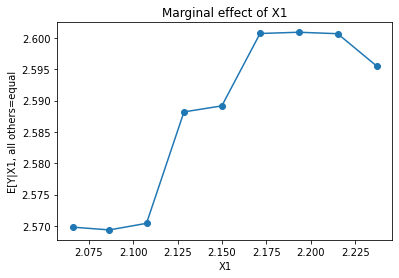

In [ ]:
plt.scatter(param["x1"],regr.predict(param))
plt.plot(param["x1"],regr.predict(param))
plt.title("Marginal effect of X1")
plt.xlabel("X1")
plt.ylabel("E[Y|X1, all others=equal")
plt.show()


# 자 이제 작업을 시작하자!!

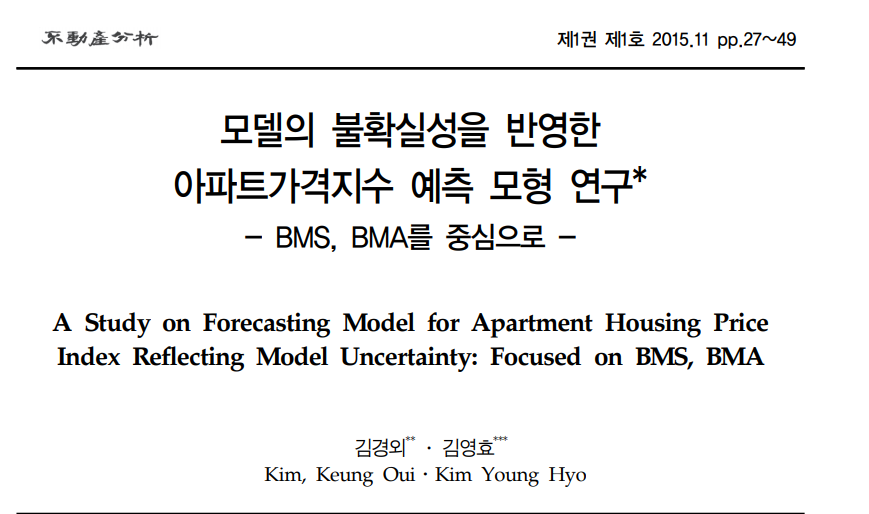

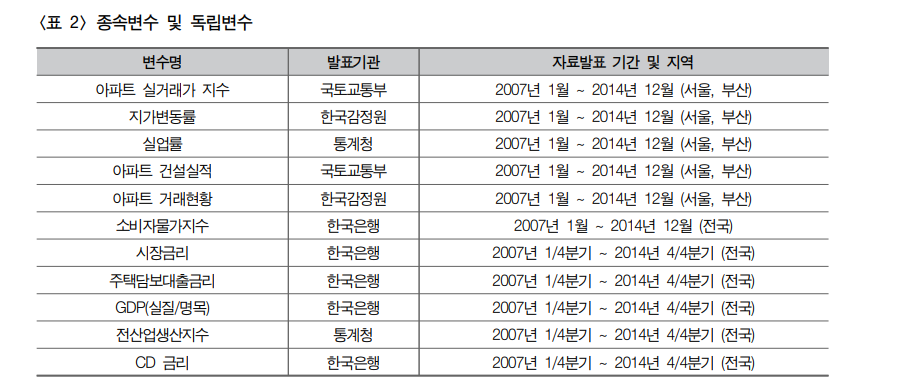

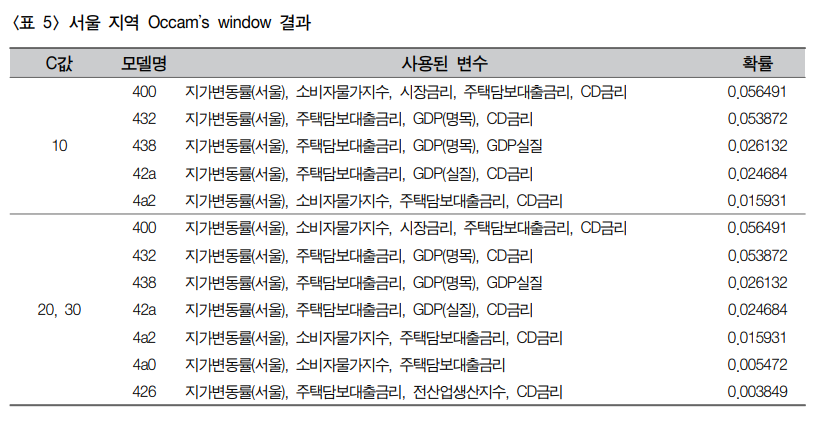

In [52]:
## 데이터 불러오기 (KB국민은행 주택가격동향) 
XX = pd.read_csv('apt_X.csv')      ## 시도별 아파트 매매가격 지수, 서울은 동별 (2015년 1월~2020년 10월)
XX

,month,price_M,price_J,unemployment,construction_N,construction_S,apt_sales_S,apt_sales_G,land_price_S,land_price_G,cpi,interest_gukgo,interest_home,interest_CD,interest_base,interest_firm,sentiment_N,sentiment_S,kospi growth,cycle_index,production_index,investment,nominal GDP,GDP growth,un_sold_N,un_sold_S,house_loan_N,house_loan_S,conservative
0,Dec-12,71.97155,76.95718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013/01,71.80000,77.70000,3.4,10.083807,8.239857,8.019942,5.153292,-0.06%,0.03%,4.582423,2.750,5.46,2.86,2.75,3.20,4.721174,4.737951,-0.011605,4.602166,4.546481,4.454347,12.780957,2.3,11.227641,8.135933,13.394287,12.206434,1.0
2,2013/02,71.60000,78.60000,3.9,9.980032,8.035926,8.345455,5.826000,0.06%,0.11%,4.585763,2.700,5.32,2.83,2.75,3.06,4.783316,4.804840,0.032397,4.601162,4.495355,4.428433,12.780957,2.3,11.203488,8.104099,13.391544,12.203278,1.0
3,2013/03,71.70000,79.20000,3.5,10.310651,8.325306,8.827615,6.214608,0.11%,0.17%,4.584835,2.600,5.23,2.81,2.75,2.95,4.760463,4.744062,-0.010716,4.601162,4.582925,4.452019,12.780957,2.3,11.165253,8.060856,13.392488,12.201513,1.0
4,2013/04,71.70000,79.20000,3.2,10.338997,8.578100,9.022926,6.354370,0.16%,0.33%,4.583446,2.550,5.12,2.80,2.75,2.91,4.771532,4.775756,-0.020611,4.600158,4.572647,4.434382,12.829594,2.9,11.159118,8.017967,13.394646,12.202263,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020/07,107.70000,105.00000,4.0,10.601075,8.395026,10.087391,7.017506,0.43%,0.48%,4.652626,0.826,3.07,0.79,0.50,2.22,4.818667,4.964940,0.064754,4.608166,4.670021,4.723842,13.065429,-2.5,10.271008,4.060443,13.925306,12.737575,0.0
92,2020/08,109.30000,106.50000,3.1,10.249486,8.034631,9.415483,6.836259,0.42%,0.50%,4.658711,0.829,2.89,0.68,0.50,2.19,4.810557,4.905275,0.033573,4.608166,4.628887,4.680278,13.065429,-2.5,10.269206,4.025352,13.936043,12.752951,0.0
93,2020/09,111.10000,108.50000,3.6,10.482514,8.562549,9.488502,6.984716,0.40%,0.43%,4.665324,0.908,2.95,0.63,0.50,2.24,4.817859,4.869072,0.000739,4.608166,4.695011,4.755313,13.065429,-2.5,10.250935,3.988984,13.944942,12.766271,0.0
94,2020/10,112.10000,110.00000,3.7,10.412021,8.864181,9.237566,6.584791,0.38%,0.40%,4.659753,0.910,2.97,0.63,0.50,2.24,4.877485,4.902307,-0.026439,4.608166,4.672829,4.722953,13.065429,-2.5,10.192531,3.951244,13.944942,12.766271,0.0


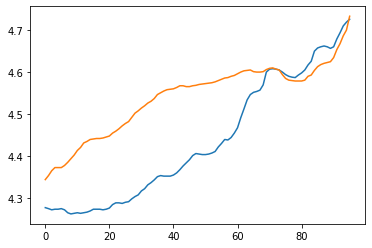

In [53]:
x1=np.log(XX.price_M)   # 강남구 매매가격 (KB)
x2=np.log(XX.price_J)   # 강남구 매매가격
plt.plot(x1)
plt.plot(x2)
plt.show() 

# 계절조정 if necessary

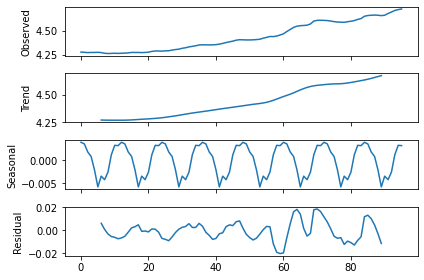

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series into daily trend, seasonal, and residual components.
# Note that the settlement price = average daily price.
decomp1 = seasonal_decompose  (x1, freq=12)
decomp2 = seasonal_decompose  (x2, freq=12)

# Plot the decomposed time series to interpret.
decomp1.plot();

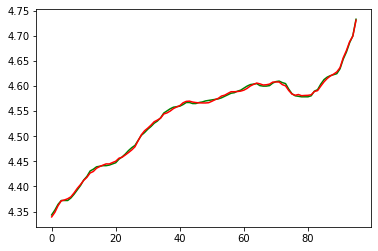

In [55]:
z1=x1 - decomp1.seasonal
z2=x2 - decomp2.seasonal

plt.plot(x2, "g")
plt.plot(z2, "r")   # 계절조정된 것
plt.show()

In [56]:
XX["price_M"]=z1; XX["price_J"]=z2   # 계절조정된 값으로 대체

In [57]:
XX

,month,price_M,price_J,unemployment,construction_N,construction_S,apt_sales_S,apt_sales_G,land_price_S,land_price_G,cpi,interest_gukgo,interest_home,interest_CD,interest_base,interest_firm,sentiment_N,sentiment_S,kospi growth,cycle_index,production_index,investment,nominal GDP,GDP growth,un_sold_N,un_sold_S,house_loan_N,house_loan_S,conservative
0,Dec-12,4.272330,4.339222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013/01,4.270293,4.348321,3.4,10.083807,8.239857,8.019942,5.153292,-0.06%,0.03%,4.582423,2.750,5.46,2.86,2.75,3.20,4.721174,4.737951,-0.011605,4.602166,4.546481,4.454347,12.780957,2.3,11.227641,8.135933,13.394287,12.206434,1.0
2,2013/02,4.269254,4.361599,3.9,9.980032,8.035926,8.345455,5.826000,0.06%,0.11%,4.585763,2.700,5.32,2.83,2.75,3.06,4.783316,4.804840,0.032397,4.601162,4.495355,4.428433,12.780957,2.3,11.203488,8.104099,13.391544,12.203278,1.0
3,2013/03,4.271634,4.371364,3.5,10.310651,8.325306,8.827615,6.214608,0.11%,0.17%,4.584835,2.600,5.23,2.81,2.75,2.95,4.760463,4.744062,-0.010716,4.601162,4.582925,4.452019,12.780957,2.3,11.165253,8.060856,13.392488,12.201513,1.0
4,2013/04,4.274537,4.373035,3.2,10.338997,8.578100,9.022926,6.354370,0.16%,0.33%,4.583446,2.550,5.12,2.80,2.75,2.91,4.771532,4.775756,-0.020611,4.600158,4.572647,4.434382,12.829594,2.9,11.159118,8.017967,13.394646,12.202263,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020/07,4.683541,4.656678,4.0,10.601075,8.395026,10.087391,7.017506,0.43%,0.48%,4.652626,0.826,3.07,0.79,0.50,2.22,4.818667,4.964940,0.064754,4.608166,4.670021,4.723842,13.065429,-2.5,10.271008,4.060443,13.925306,12.737575,0.0
92,2020/08,4.696635,4.671131,3.1,10.249486,8.034631,9.415483,6.836259,0.42%,0.50%,4.658711,0.829,2.89,0.68,0.50,2.19,4.810557,4.905275,0.033573,4.608166,4.628887,4.680278,13.065429,-2.5,10.269206,4.025352,13.936043,12.752951,0.0
93,2020/09,4.709196,4.688727,3.6,10.482514,8.562549,9.488502,6.984716,0.40%,0.43%,4.665324,0.908,2.95,0.63,0.50,2.24,4.817859,4.869072,0.000739,4.608166,4.695011,4.755313,13.065429,-2.5,10.250935,3.988984,13.944942,12.766271,0.0
94,2020/10,4.716109,4.699812,3.7,10.412021,8.864181,9.237566,6.584791,0.38%,0.40%,4.659753,0.910,2.97,0.63,0.50,2.24,4.877485,4.902307,-0.026439,4.608166,4.672829,4.722953,13.065429,-2.5,10.192531,3.951244,13.944942,12.766271,0.0


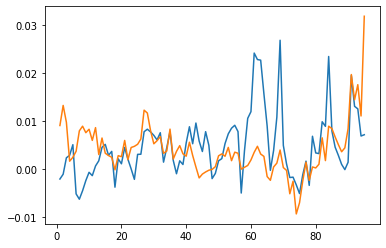

In [58]:
y1=XX.price_M.diff().dropna()  # 강남구 매매가격 차분 구하기 ==> 변화율
y2=XX.price_J.diff().dropna()  # 강남구 전세가격 차분 구하기 ==> 변화율
plt.plot(y1)
plt.plot(y2)
plt.show()

In [65]:
X=XX[0:len(XX)-1].dropna()   # t-1 기 자료
del X["month"]

X["price_M"]=y1[0:len(y1)-1].values   # 전기(t-1)의 매매 가격 성장율
X["price_J"]=y2[0:len(y2)-1].values   # 전기의 전세 가격 성장율
del X["interest_CD"]
del X["interest_base"]   ## 상관관계가 매우 높은 변수는 제외
X

,price_M,price_J,unemployment,construction_N,construction_S,apt_sales_S,apt_sales_G,land_price_S,land_price_G,cpi,interest_gukgo,interest_home,interest_firm,sentiment_N,sentiment_S,kospi growth,cycle_index,production_index,investment,nominal GDP,GDP growth,un_sold_N,un_sold_S,house_loan_N,house_loan_S,conservative
1,-0.002037,0.009099,3.4,10.083807,8.239857,8.019942,5.153292,-0.06%,0.03%,4.582423,2.750,5.46,3.20,4.721174,4.737951,-0.011605,4.602166,4.546481,4.454347,12.780957,2.3,11.227641,8.135933,13.394287,12.206434,1.0
2,-0.001039,0.013278,3.9,9.980032,8.035926,8.345455,5.826000,0.06%,0.11%,4.585763,2.700,5.32,3.06,4.783316,4.804840,0.032397,4.601162,4.495355,4.428433,12.780957,2.3,11.203488,8.104099,13.391544,12.203278,1.0
3,0.002380,0.009765,3.5,10.310651,8.325306,8.827615,6.214608,0.11%,0.17%,4.584835,2.600,5.23,2.95,4.760463,4.744062,-0.010716,4.601162,4.582925,4.452019,12.780957,2.3,11.165253,8.060856,13.392488,12.201513,1.0
4,0.002903,0.001671,3.2,10.338997,8.578100,9.022926,6.354370,0.16%,0.33%,4.583446,2.550,5.12,2.91,4.771532,4.775756,-0.020611,4.600158,4.572647,4.434382,12.829594,2.9,11.159118,8.017967,13.394646,12.202263,1.0
5,0.005108,0.002486,3.0,10.478583,8.733272,9.162934,6.529419,0.15%,0.29%,4.583446,2.590,4.93,2.96,4.764735,4.768139,0.018689,4.602166,4.580877,4.464758,12.829594,2.9,11.110894,7.975221,13.399809,12.206289,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.001452,0.008455,4.3,10.406654,8.204945,9.665294,7.584773,0.37%,0.45%,4.652721,0.850,3.18,2.22,4.810557,4.906755,0.038057,4.604170,4.702297,4.731803,13.065429,-2.7,10.284045,4.110874,13.919076,12.727533,0.0
91,0.019515,0.019706,4.0,10.601075,8.395026,10.087391,7.017506,0.43%,0.48%,4.652626,0.826,3.07,2.22,4.818667,4.964940,0.064754,4.608166,4.670021,4.723842,13.065429,-2.5,10.271008,4.060443,13.925306,12.737575,0.0
92,0.013094,0.014453,3.1,10.249486,8.034631,9.415483,6.836259,0.42%,0.50%,4.658711,0.829,2.89,2.19,4.810557,4.905275,0.033573,4.608166,4.628887,4.680278,13.065429,-2.5,10.269206,4.025352,13.936043,12.752951,0.0
93,0.012561,0.017596,3.6,10.482514,8.562549,9.488502,6.984716,0.40%,0.43%,4.665324,0.908,2.95,2.24,4.817859,4.869072,0.000739,4.608166,4.695011,4.755313,13.065429,-2.5,10.250935,3.988984,13.944942,12.766271,0.0


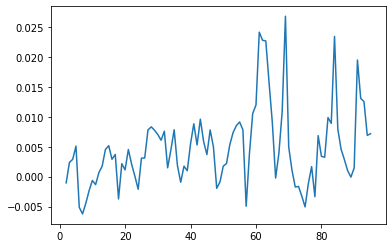

In [78]:
y=y1[1:len(y1)]   # 종속변수 지정 (t) 
y.plot()